In [0]:
# Import necessary frameworks
import numpy as np
import cv2
from skimage.exposure import rescale_intensity

In [0]:
# Import frameworks for visualization in this notebook
import matplotlib.pyplot as plt
from google.colab import files

In [0]:
# Read original image in greyscale
ogimg = cv2.imread('INPUT.jpg',cv2.IMREAD_GRAYSCALE)

True

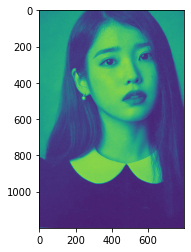

In [4]:
# Run cell to visualize and download original image
plt.imshow(ogimg)
cv2.imwrite('OG.jpg',ogimg)

In [0]:
# Convolution function
def convolve(img,kernel):
  # establish variables for the image height and length
  (imgHeight,imgLength) = img.shape[:2]

  # establish variables for the kernel height and length
  (kHeight,kLength) = kernel.shape[:2]

  # A padded border is needed to deal with edge cases so
  # we first calculate the thickness of the pad
  pad = (kLength-1)//2

  # Make a border with thickness of the aforementioned pad
  img = cv2.copyMakeBorder(img,pad,pad,pad,pad,cv2.BORDER_REPLICATE)
  
  # establish numpy 2D array the size of the original image
  final = np.zeros((imgHeight,imgLength),dtype='float32')

  # apply convolutions from left to right, then up to down
  for i in range(pad,imgHeight+pad):
    for j in range(pad,imgLength+pad):
      # define region of interest
      region = img[i-pad:i+pad+1,j-pad:j+pad+1]
      # sum up the new value of the center element
      newVal = (region*kernel).sum()
      final[i-pad,j-pad] = newVal

  # normalize pixel value to lie in range 0-255    
  final = rescale_intensity(final,in_range=(0,255))
  final = (final * 255).astype("uint8")
  # return manipulated image
  return final

In [0]:
# KERNELS

# Identity
identity = np.array([[0,0,0],[0,1,0],[0,0,0]],dtype='int')

# Sharpen
sharpen = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]],dtype='int')

# Edge Detection
edgedetect = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]],dtype='int')

# Box Blur
boxblur = np.array([[1,1,1],[1,1,1],[1,1,1]],dtype='int') / 9 

# Gaussian Blur 
gblur = np.array([[1,2,1],[2,4,2],[1,2,1]],dtype='int') / 16 

In [0]:
# Cell I use for generating all of the new images

for manip in [sharpen,edgedetect,boxblur,gblur]:
  newimg = convolve(ogimg,manip)
  cv2.imwrite('{0}.jpg'.format(manip),newimg)